<a href="https://colab.research.google.com/github/kefasmanu/NLP-FELLOWSHIP/blob/main/quora%20classification%20competition/quora_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# quora-text-classification

Outline:
 * Dowload and explore the data
 *Apply text preprocessing techiques
 * Implement the bag of words model
 *Train ML models for text classification
 * Make predictions and submit to kaggle 

## Download and Explore the Data

1. Download the Data to Colab
2. Explore the data Using Pandas
3. Create a small working sample

In [2]:
!ls

kaggle.json  sample_data


In [3]:
import os

In [4]:
os.environ['KAGGLE_CONFIG_DIR']='.'

In [5]:
#!chmod 600 ./kaggle.json

In [6]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data

 82% 45.0M/54.9M [00:01<00:00, 44.3MB/s]
100% 54.9M/54.9M [00:01<00:00, 41.3MB/s]


In [7]:
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
#!kaggle competitions download -c quora-insincere-questions-classification -f sample.csv -p data

 63% 10.0M/15.8M [00:00<00:00, 34.6MB/s]
100% 15.8M/15.8M [00:00<00:00, 52.8MB/s]


Explore the Data Using Pandas

In [8]:
train_frame = 'data/train.csv.zip'
test_frame = 'data/test.csv.zip'
sample_frame = 'data/sample_submission.csv.zip'

In [9]:
import pandas as pd

In [10]:
raw_df = pd.read_csv(train_frame)
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [11]:
#creating frame for sincere questions
sincere_df = raw_df[raw_df.target==0]

In [12]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [13]:
#Creating Df for the insincere questions
insincere_df = raw_df[raw_df.target==1]
insincere_df

,qid,question_text,target
22,0000e91571b60c2fb487,Has the United States become the largest dicta...,1
30,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1
110,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1
114,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1
115,000537213b01fd77b58a,Which races have the smallest penis?,1
...,...,...,...
1306093,fffeba722d9b371bd1b9,How is it to have intimate relation with your ...,1
1306094,fffee269360dd0d3947a,Why is it when singers have lyrics about voice...,1
1306099,ffff0e4ea1bb6e16feec,Do pakis smell of curry and shit?,1
1306103,ffff3f0a2449ffe4b9ff,Isn't Trump right after all? Why should the US...,1


In [14]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [15]:
#Checking the numbers of sincere and insincere questions
raw_df.target.value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [16]:
#Checking the numbers of sincere and insincere questions
raw_df.target.value_counts(normalize = True)

0    0.93813
1    0.06187
Name: target, dtype: float64

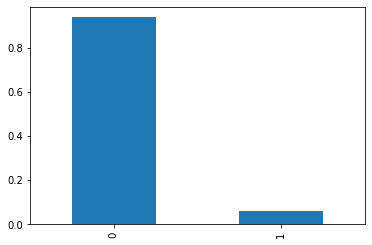

In [17]:
#Plotting the data
#Checking the numbers of sincere and insincere questions
raw_df.target.value_counts(normalize = True). plot(kind='bar')

In [18]:
#Testing dataframe
test_df = pd.read_csv(test_frame)
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [19]:
 #Submission CSV file
sub_df = pd.read_csv(sample_framesample_frame)
sub_df

Create a working sample

In [20]:
SAMPLE_SIZE = 100_000

In [21]:
sample_df = raw_df.sample(SAMPLE_SIZE, random_state=42)# setting the random state  just to get the same sample every time

In [22]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


Note, because of the imbalance, model accuracy is not always the best way of evaluating the model performance; F1 Scores could be used.

## TEXT PREPROCESSING TECHNIQUES
1. Understand the bag of words model
2. Tokenization
3. Stop word removal
4. Stemming


## Bag of words Intuition
1. Create a list of all the words across all the text documents
2. You convert each document into vector counts of each word

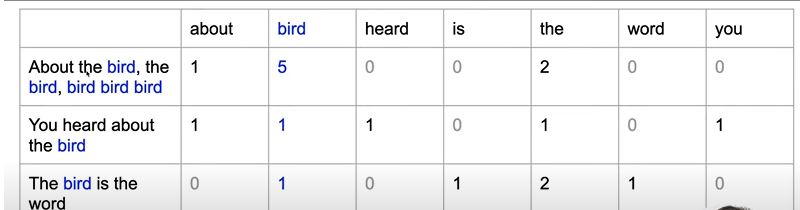

Bag of words entails identifying all the unique words in the dataset, creating a document for each words as above and counting them.
#limitation of creating bag of words
1. There may be too many words in the dataset
2. Some words may occur too frequently
3. Some words may occur rarely or only once
4. A single word may have many form e.g gone, going birds, bird, do, doing.

#Hence the is a need to preprocess before creating the bag of words

#Tokenization
Solitting a document into words and separators

In [23]:
q0 =sincere_df.question_text.values[1]

q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [24]:
q1=insincere_df.question_text.values[1]
q1

'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?'

In [25]:
#import nltk
import nltk
#import tokenization library
from nltk.tokenize import word_tokenize


In [26]:
#download punk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
word_tokenize(q0)

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [28]:
word_tokenize(q1)

['Which',
 'babies',
 'are',
 'more',
 'sweeter',
 'to',
 'their',
 'parents',
 '?',
 'Dark',
 'skin',
 'babies',
 'or',
 'light',
 'skin',
 'babies',
 '?']

In [29]:
q0_tok = word_tokenize(q0)
q1_tok = word_tokenize(q1)

##STOP WORDS REMOVAL

Removing commonly occuring words eg. is, to , the ....

In [30]:
from nltk.corpus import  stopwords

In [31]:
#downloading stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
english_stopwords = stopwords.words('english')
' '.join(english_stopwords)# to print the stopwords nicely

"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't"

Note: For the purpose of text classifcation we may no need to worry about removing stopwords but for sentiment analysis, we may need it remove stopwords

In [33]:
def remove_stopwords(tokens):
  return [word for word in tokens if word.lower() not in english_stopwords]

In [34]:
q0_tok

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [35]:
#Removing stopwords in q0
q0_stp = remove_stopwords(q0_tok)
q0_stp 

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [36]:
#Removing stopwords in q0
q1_stp = remove_stopwords(q1_tok)
q1_stp 

['babies',
 'sweeter',
 'parents',
 '?',
 'Dark',
 'skin',
 'babies',
 'light',
 'skin',
 'babies',
 '?']

####STEMMING
The process of making vocabularies into their root words e.g 

In [37]:
from nltk.stem.snowball import SnowballStemmer

In [38]:
stemmer = SnowballStemmer(language='english')

In [39]:
stemmer.stem('going')

'go'

In [40]:
q0_stm = [stemmer.stem(word) for word in q0_stp]
q0_stm

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

####LEMMATIZATION
Lemmatization reduces the words into the meaningful root words by looking  at a dictionary.
Note: lemmatization is better is better but not used in buliding bag of words

## Implement Bag of words
1. Create a vacabulary using count Vectorizer
2. Transform text to vector using count vectorizer
3. Configure text preprocessing un Count Vectorizer


#### Create a vacabulary using count Vectorize

Count vectorizer convert a collection of text documents to a matrix of token count

In [41]:
small_df= sample_df[:5]

In [42]:
small_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0


In [43]:
small_df.question_text.values

array(['What is the most effective classroom management skill/technique to create a good learning environment?',
       'Can I study abroad after 10th class from Bangladesh?',
       'How can I make friends as a college junior?',
       'How do I download free APK Minecraft: Pocket Edition for iOS (iPhone)?',
       'Like Kuvera, is "Groww" also a free online investment platform where I can invest in direct mutual funds?'],
      dtype=object)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
small_vect = CountVectorizer()

In [46]:
small_vect.fit(small_df.question_text)

CountVectorizer()

In [47]:
small_vect.vocabulary_

{'what': 49,
 'is': 31,
 'the': 47,
 'most': 39,
 'effective': 16,
 'classroom': 9,
 'management': 37,
 'skill': 44,
 'technique': 46,
 'to': 48,
 'create': 11,
 'good': 23,
 'learning': 34,
 'environment': 17,
 'can': 7,
 'study': 45,
 'abroad': 1,
 'after': 2,
 '10th': 0,
 'class': 8,
 'from': 21,
 'bangladesh': 6,
 'how': 25,
 'make': 36,
 'friends': 20,
 'as': 5,
 'college': 10,
 'junior': 32,
 'do': 13,
 'download': 14,
 'free': 19,
 'apk': 4,
 'minecraft': 38,
 'pocket': 43,
 'edition': 15,
 'for': 18,
 'ios': 29,
 'iphone': 30,
 'like': 35,
 'kuvera': 33,
 'groww': 24,
 'also': 3,
 'online': 41,
 'investment': 28,
 'platform': 42,
 'where': 50,
 'invest': 27,
 'in': 26,
 'direct': 12,
 'mutual': 40,
 'funds': 22}

In [48]:
small_vect.get_feature_names_out()

array(['10th', 'abroad', 'after', 'also', 'apk', 'as', 'bangladesh',
       'can', 'class', 'classroom', 'college', 'create', 'direct', 'do',
       'download', 'edition', 'effective', 'environment', 'for', 'free',
       'friends', 'from', 'funds', 'good', 'groww', 'how', 'in', 'invest',
       'investment', 'ios', 'iphone', 'is', 'junior', 'kuvera',
       'learning', 'like', 'make', 'management', 'minecraft', 'most',
       'mutual', 'online', 'platform', 'pocket', 'skill', 'study',
       'technique', 'the', 'to', 'what', 'where'], dtype=object)

###Transform documents into Vector

In [49]:
vectors=small_vect.transform(small_df.question_text)

In [50]:
vectors

<5x51 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [51]:
vectors.shape


(5, 51)

In [52]:
vectors.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1]])

Configure Count Vectorizer Paramenters

In [53]:
stemmer = SnowballStemmer(language='english')

In [54]:
def tokenize(text):
  return [stemmer.stem(word) for word in word_tokenize(text) if word.lower() not in english_stopwords]

In [55]:
vectorizer = CountVectorizer(lowercase =True,
                             tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features =1000)

In [56]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [57]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)


CPU times: user 30.2 s, sys: 138 ms, total: 30.4 s
Wall time: 30.6 s


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7fefc8c5b4d0>)

In [58]:
vectorizer.vocabulary_

{'effect': 298,
 'manag': 546,
 'creat': 235,
 'good': 400,
 'learn': 508,
 '?': 31,
 'studi': 872,
 'abroad': 36,
 'class': 194,
 'make': 543,
 'friend': 379,
 'colleg': 202,
 'download': 281,
 'free': 377,
 ':': 30,
 '(': 8,
 'iphon': 476,
 ')': 9,
 'like': 521,
 ',': 10,
 '``': 34,
 "''": 5,
 'also': 67,
 'onlin': 635,
 'invest': 474,
 'platform': 677,
 'direct': 273,
 'fund': 382,
 'record': 747,
 'read': 738,
 'term': 901,
 "'s": 7,
 'role': 774,
 'get': 392,
 'univers': 938,
 'germani': 391,
 'new': 613,
 'skill': 829,
 'anyth': 81,
 'old': 633,
 'english': 310,
 'militari': 578,
 'capit': 159,
 'way': 958,
 'earn': 289,
 'money': 588,
 'use': 942,
 'brand': 142,
 'car': 160,
 'alway': 69,
 'prefer': 694,
 'player': 679,
 'india': 454,
 'play': 678,
 'need': 608,
 'purchas': 721,
 'insur': 465,
 'educ': 297,
 'technolog': 898,
 'compani': 210,
 'come': 204,
 'economi': 296,
 'pursu': 723,
 'mba': 561,
 'activ': 46,
 'place': 672,
 'citizen': 191,
 "'": 4,
 'featur': 351,
 'air': 

In [59]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '30', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``',
       'abl', 'abroad', 'abus', 'accept', 'access', 'accomplish',
       'accord', 'account', 'achiev', 'act', 'action', 'activ', 'actor',
       'actual', 'ad', 'add', 'address', 'admiss', 'adult', 'advanc',
       'advantag', 'advic', 'affect', 'africa', 'african', 'age', 'agre',
       'air', 'allow', 'almost', 'alon', 'alreadi', 'also', 'altern',
       'alway', 'amazon', 'america', 'american', 'amount', 'analysi',
       'android', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

In [60]:

#Transformation into bag of words
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 28.8 s, sys: 103 ms, total: 28.9 s
Wall time: 29 s


In [61]:
inputs.shape

(100000, 1000)

In [62]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [63]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 1min 45s, sys: 312 ms, total: 1min 46s
Wall time: 1min 46s


## ML Models for Text Classification

Outline:
1. Create a training and validation set
2. Train a logistic  regression model
3. Make predictions on training, validation and test set

### Split into Training and Validation

In [64]:
sample_df


,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [65]:
inputs.shape

(100000, 1000)

In [67]:
from sklearn.model_selection import train_test_split

In [69]:
train_inputs, val_inputs,train_targets, val_targets = train_test_split(inputs, sample_df.target,test_size=0.3, random_state =42)

In [70]:
train_targets.shape

(70000,)

In [71]:
val_inputs.shape

(30000, 1000)

### Train a Logistic Regression Model

In [72]:
from sklearn.linear_model import LogisticRegression

In [75]:
model = LogisticRegression(max_iter=1000,solver='sag')#by defaulth the max iteration is set 100

In [76]:
model.fit(train_inputs, train_targets)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(max_iter=1000, solver='sag')

In [77]:
train_preds = model.predict(train_inputs)
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
pd.Series(train_preds).value_counts()

0    68123
1     1877
dtype: int64

In [79]:
pd.Series(train_targets).value_counts()

0    65784
1     4216
Name: target, dtype: int64

Make predictions using the model

In [80]:
# Checking how good the model is
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(train_targets, train_preds)

0.9482714285714285

In [83]:
#Using the F1 score which is better for checking the accuracy
from sklearn.metrics import f1_score

In [84]:
f1_score(train_targets, train_preds)

0.40571147218119147

In [85]:
#Making Predictions on the validation set
val_preds = model.predict(val_inputs)

In [86]:
accuracy_score(val_targets, val_preds)

0.945

In [87]:
f1_score(val_targets, val_preds)

0.3778280542986426

In [88]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [89]:
sincere_df.target.values[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [90]:
model.predict(vectorizer.transform(sincere_df.question_text.values[:10]))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

## Make Predictions

In [91]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [92]:
test_inputs.shape

(375806, 1000)

In [93]:
test_preds = model.predict(test_inputs)

In [ ]:
print('Hello World')